# 傅里叶变换 初步



傅里叶变换（法語：Transformation de Fourier; 英語：Fourier transform; 简称：FT）是一种线性积分变换，用于函数（应用上称作「信号」）在时域和频域之间的变换。 因其基本思想首先由法国学者约瑟夫·傅里叶系统地提出，所以以其名字来命名以示纪念。

傅里叶变换（法語：Transformation de Fourier; 英語：Fourier transform; 简称：FT）是一种线性积分变换，用于函数（应用上称作「信号」）在时域和频域之间的变换。因其基本思想首先由法国学者约瑟夫·傅里叶系统地提出，所以以其名字来命名以示纪念。

傅里叶变换在物理学和工程学中有许多应用。傅里叶变换的作用是将函数分解为不同特征的正弦函数的和，如同化学分析来分析一个化合物的元素成分。对于一个函数，也可对其进行分析，来确定组成它的基本（正弦函数）成分。

经过傅里叶变换生成的函数 f ^ {\displaystyle {\hat {f}}} \hat f 称作原函数 f {\displaystyle f} f 的傅里叶变换，应用意义上称作频谱。在特定情況下，傅里叶变换是可逆的，即将 f ^ {\displaystyle {\hat {f}}} \hat f 通过逆变换可以得到其原函数 f {\displaystyle f} f。通常情况下， f {\displaystyle f} f 是一个实函数，而 f ^ {\displaystyle {\hat {f}}} \hat f 则是一个复数值函数，其函数值作为复数可同时表示振幅和相位。高斯函数是傅里叶变换的本征函数。 


傅里叶变换在医学、数据科学、物理学、声学、光学、结构力学、量子力学、数论、组合数学、概率论、统计学、信号处理、密码学、大氣科學、海洋学、通讯、金融等领域都有着广泛的应用。例如在信号处理中，傅里叶变换的典型用途是将复杂的信号分解成具有不同振幅的单一频率分量，并以此实现滤波等操作；进一步的，量子力学中位置空间的波函数的傅里叶变换是动量空间的波函数。 

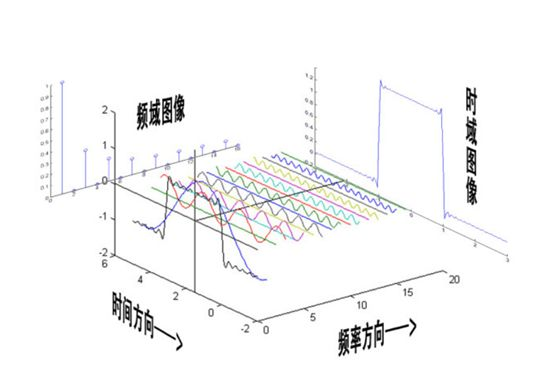

# 热身

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

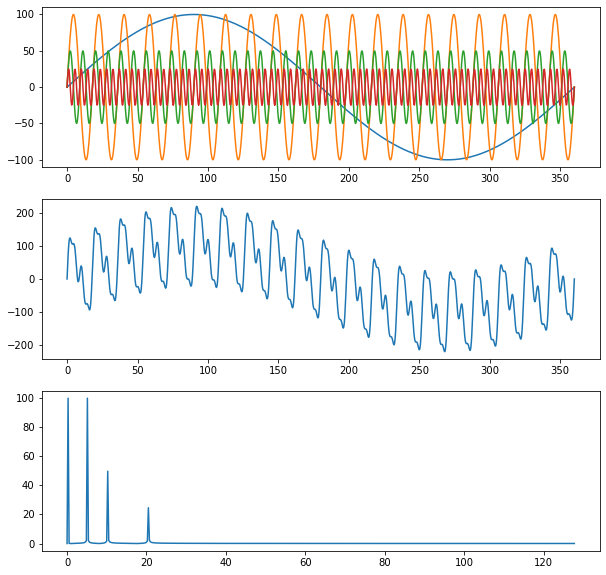

In [25]:
# 写段程序吧? 画一个标准的正弦函数，必须用Numpyx
x = np.linspace(0,360,1000)
f1 = 100*np.sin(x*np.pi/180)
f2 = 100*np.sin(20*x*np.pi/180)
f3 = 50*np.sin(40*x*np.pi/180)
f4 = 25*np.sin(80*x*np.pi/180)
f5 = f1+f2+f3+f4
fig, ax = plt.subplots(3, 1,figsize=(10,10))
ax[0].plot(x,f1)
ax[0].plot(x,f2)
ax[0].plot(x,f3)
ax[0].plot(x,f4)
ax[1].plot(x,f5)
N = len(x)
freq = np.arange(N) / N * Fs
Y = np.fft.fft(f5)/(N/2)
Y[0] = Y[0] / 2
freq_half = freq[range(int(N/2))]
Y_half = Y[range(int(N/2))]
ax[2].plot(freq_half,abs(Y_half))

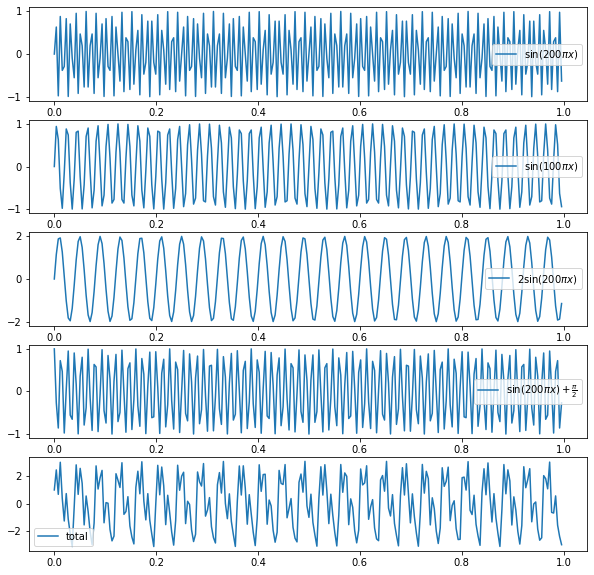

In [19]:
Fs=256
x=np.arange(0,1,1/Fs)
N = len(x)
F1=np.sin(2*np.pi*100*x)
F2=np.sin(2*np.pi*x*50)
F3=2*np.sin(2*np.pi*25*x)
F4=np.sin(2*np.pi*75*x+(np.pi/2))


fig, ax = plt.subplots(5, 1, figsize=(10, 10))

ax[0].plot(x,F1,label=r"$\sin(200{\pi}x)$")
ax[0].legend()
ax[1].plot(x,F2,label=r"$\sin(100{\pi}x)$")
ax[1].legend()
ax[2].plot(x,F3,label=r"$2\sin(200{\pi}x)$")
ax[2].legend()
ax[3].plot(x,F4,label=r"$\sin(200{\pi}x)+\frac{\pi}{2}$")
ax[3].legend()
ax[4].plot(x,F1+F2+F3+F4,label='total')
ax[4].legend()


plt.show()


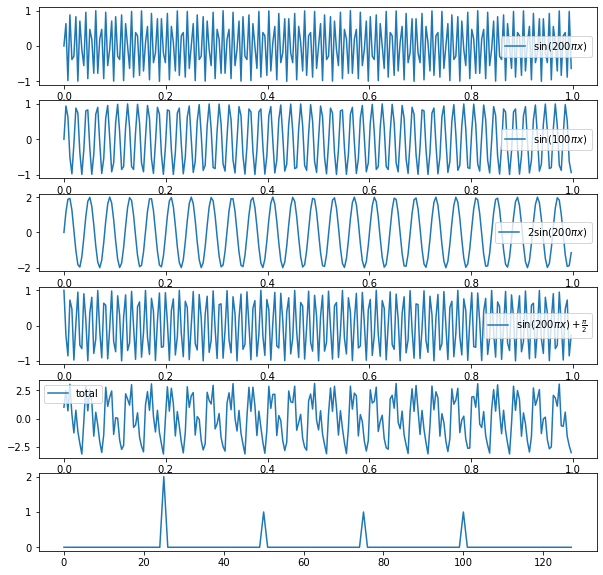

In [20]:
freq = np.arange(N) / N * Fs

Y = np.fft.fft(F1+F2+F3+F4)/(N/2)
Y[0] = Y[0] / 2
freq_half = freq[range(int(N/2))]
Y_half = Y[range(int(N/2))]
fig, ax = plt.subplots(6, 1, figsize=(10, 10))

ax[0].plot(x,F1,label=r"$\sin(200{\pi}x)$")
ax[0].legend()
ax[1].plot(x,F2,label=r"$\sin(100{\pi}x)$")
ax[1].legend()
ax[2].plot(x,F3,label=r"$2\sin(200{\pi}x)$")
ax[2].legend()
ax[3].plot(x,F4,label=r"$\sin(200{\pi}x)+\frac{\pi}{2}$")
ax[3].legend()
ax[4].plot(x,F1+F2+F3+F4,label='total')
ax[4].legend()

ax[5].plot(freq_half,abs(Y_half))

### 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

%matplotlib inline

# #############################################################################
# Set a fixed random seed for reproducible reasons

np.random.seed(0)
n_samples = 2000

# Pick 2000 samples between 0 and 8, equally spaced.
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Sinusoidal, Signal 1
s2 = np.sign(np.sin(3 * time))  # Squared, Signal 2
s3 = signal.sawtooth(2 * np.pi * time)  # Sawtooth, Signal 3

# The first plot with all the signals, as it may be in reality.
plt.figure(1)
plt.title('Sinusoidal')
plt.subplot(3,1,1)
plt.plot(s1, color='red')
plt.title('Squared')
plt.subplot(3,1,2)
plt.plot(s2, color='steelblue')
plt.title('Sawtooth')
plt.subplot(3,1,3)
plt.plot(s3, color='orange')


# Put all the signals together in a multichannel arrangement
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add high frequency noise.

# These are the nosiy signals.
plt.figure(2)
plt.title('Noisy Signals')
plt.subplot(3,1,1)
plt.plot(S[:,0], color='red')
plt.title('')
plt.subplot(3,1,2)
plt.plot(S[:,1], color='steelblue')
plt.title('')
plt.subplot(3,1,3)
plt.plot(S[:,2], color='orange')


S /= S.std(axis=0)  # Standardize data

# A is the mixing matrix
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

print("Observations are the signals as if they were obtained by real sensors, mixed and noisy signals %d,%d" % X.shape)

plt.figure(3)
plt.title('Observation 1')
plt.subplot(3,1,1)
plt.plot(X[:,0], color='red')
plt.title('Observation 2')
plt.subplot(3,1,2)
plt.plot(X[:,1], color='steelblue')
plt.title('Observation 3')
plt.subplot(3,1,3)
plt.plot(X[:,2], color='orange')


# From this point, we would like to do the opposite and recover the original sources, undoing the mixing process.
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results


plt.figure(4)
plt.title('ICA 1')
plt.subplot(3,1,1)
plt.plot(S_[:,0], color='red')
plt.title('ICA 2')
plt.subplot(3,1,2)
plt.plot(S_[:,1], color='steelblue')
plt.title('ICA 3')
plt.subplot(3,1,3)
plt.plot(S_[:,2], color='orange')


import scipy.stats as stats
r, p = stats.pearsonr(S_[:,0], -X[:,1])
print(f"ICA 0 vs 1:Pearson r: {r} and p-value: {p}")

r, p = stats.pearsonr(S_[:,1], X[:,2])
print(f"ICA 1 vs 2:Pearson r: {r} and p-value: {p}")

r, p = stats.pearsonr(S_[:,2], X[:,0])
print(f"ICA 2 vs 0:Pearson r: {r} and p-value: {p}")

plt.figure(5)
plt.title('PCA 1')
plt.subplot(3,1,1)
plt.plot(H[:,0], color='red')
plt.title('PCA 2')
plt.subplot(3,1,2)
plt.plot(H[:,1], color='steelblue')
plt.title('PCA 3')
plt.subplot(3,1,3)
plt.plot(H[:,2], color='orange')

import scipy.stats as stats
r, p = stats.pearsonr(H[:,0], X[:,1])
print(f"PCA 0 vs 1:Pearson r: {r} and p-value: {p}")

r, p = stats.pearsonr(H[:,1], X[:,2])
print(f"PCA 1 vs 2:Pearson r: {r} and p-value: {p}")

r, p = stats.pearsonr(H[:,2], X[:,0])
print(f"PCA 2 vs 0:Pearson r: {r} and p-value: {p}")


plt.figure(6)
models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()